In [1]:
#读取模型
import joblib
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#各种评价标准
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#用来画图比较
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
import matplotlib as mpl

In [2]:
#读取测试集
test_x = pd.read_csv(r"D:\social-media-usage-and-emotional-well-being\pythonProject\Data preprocessing\test_x.csv")
test_y = pd.read_csv(r"D:\social-media-usage-and-emotional-well-being\pythonProject\Data preprocessing\test_y.csv")
#读取模型
Decision_Tree_model = joblib.load('Decision_Tree_model.pickle')
GaussianNB_model = joblib.load('GaussianNB_model.pickle')
knn_model = joblib.load('knn_model.pickle')
svm_model = joblib.load('svm_model.pickle')
bagging_clf = joblib.load('bagging_clf.pickle')

In [3]:
test_x

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,27,120,4,40,18,22,False,False,False,False,True,False,False,False
1,21,60,1,18,7,12,False,True,False,False,True,False,False,False
2,28,115,3,38,18,27,False,True,False,False,True,False,False,False
3,27,105,3,48,20,28,True,False,False,False,False,True,False,False
4,21,55,3,17,7,12,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,22,70,1,20,5,22,True,False,False,False,False,False,True,False
98,33,85,4,35,18,18,True,False,False,True,False,False,False,False
99,24,110,6,35,23,25,False,True,False,False,False,False,False,False
100,24,75,3,37,16,22,True,False,False,False,False,True,False,False


In [4]:
test_y

,Dominant_Emotion
0,Neutral
1,Neutral
2,Anxiety
3,Anxiety
4,Neutral
...,...
97,Neutral
98,Boredom
99,Sadness
100,Neutral


In [5]:
#模型预测
Decision_Tree_pred = Decision_Tree_model.predict(test_x)
GaussianNB_pred = GaussianNB_model.predict(test_x)
knn_pred = knn_model.predict(test_x)
svm_pred = svm_model.predict(test_x)

决策树

In [6]:
Decision_Tree_precision = precision_score(test_y, Decision_Tree_pred, average='macro')
Decision_Tree_recall = recall_score(test_y,       Decision_Tree_pred, average='micro')
Decision_Tree_f1 = f1_score(test_y,               Decision_Tree_pred, average='weighted')
Decision_Tree_accuracy = accuracy_score(test_y,   Decision_Tree_pred)
print("\nDecision_Tree_accuracy   ",Decision_Tree_accuracy,
      "\nDecision_Tree_precision  ",Decision_Tree_precision,
      "\nDecision_Tree_recall     ",Decision_Tree_recall,
      "\nDecision_Tree_f1         ",Decision_Tree_f1)


Decision_Tree_accuracy    0.9411764705882353 
Decision_Tree_precision   0.9234126984126986 
Decision_Tree_recall      0.9411764705882353 
Decision_Tree_f1          0.94242850175804


高斯朴素贝叶斯

In [7]:
GaussianNB_precision = precision_score(test_y, GaussianNB_pred, average='macro')
GaussianNB_recall = recall_score(test_y,       GaussianNB_pred, average='micro')
GaussianNB_f1 = f1_score(test_y,               GaussianNB_pred, average='weighted')
GaussianNB_accuracy = accuracy_score(test_y,   GaussianNB_pred)
print("\nGaussianNB_accuracy   ",GaussianNB_accuracy,
      "\nGaussianNB_precision  ",GaussianNB_precision,
      "\nGaussianNB_recall     ",GaussianNB_recall,
      "\nGaussianNB_f1         ",GaussianNB_f1)


GaussianNB_accuracy    0.37254901960784315 
GaussianNB_precision   0.2778166278166278 
GaussianNB_recall      0.37254901960784315 
GaussianNB_f1          0.25447413486443143


D:\social-media-usage-and-emotional-well-being\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


knn

In [8]:
knn_precision = precision_score(test_y, knn_pred, average='macro')
knn_recall = recall_score(test_y,       knn_pred, average='micro')
knn_f1 = f1_score(test_y,               knn_pred, average='weighted')
knn_accuracy = accuracy_score(test_y,   knn_pred)
print("\nknn_accuracy   ",knn_accuracy,
      "\nknn_precision  ",knn_precision,
      "\nknn_recall     ",knn_recall,
      "\nknn_f1         ",knn_f1)


knn_accuracy    0.9215686274509803 
knn_precision   0.9085409189575855 
knn_recall      0.9215686274509803 
knn_f1          0.9219396426646769


支持向量机

In [9]:
svm_precision = precision_score(test_y, svm_pred, average='macro')
svm_recall = recall_score(test_y, svm_pred, average='micro')
svm_f1 = f1_score(test_y, svm_pred, average='weighted')
svm_accuracy = accuracy_score(test_y, svm_pred)
print("\nknn_accuracy   ", svm_accuracy,
      "\nknn_precision  ", svm_precision,
      "\nknn_recall     ", svm_recall,
      "\nknn_f1         ", svm_f1)


knn_accuracy    0.9411764705882353 
knn_precision   0.9381629240324894 
knn_recall      0.9411764705882353 
knn_f1          0.9411076711386309


集成学习

In [10]:
bagging_clf_precision = precision_score(test_y, svm_pred, average='macro')
bagging_clf_recall = recall_score(test_y, svm_pred, average='micro')
bagging_clf_f1 = f1_score(test_y, svm_pred, average='weighted')
bagging_clf_accuracy = accuracy_score(test_y, svm_pred)
print("\nbagging_clf_accuracy   ", bagging_clf_accuracy,
      "\nbagging_clf_precision  ", bagging_clf_precision,
      "\nbagging_clf_recall     ", bagging_clf_recall,
      "\nbagging_clf_f1         ", bagging_clf_f1)


bagging_clf_accuracy    0.9411764705882353 
bagging_clf_precision   0.9381629240324894 
bagging_clf_recall      0.9411764705882353 
bagging_clf_f1          0.9411076711386309


将五种模型放在一起对比

In [11]:
data = {
    'Model': ['Decision Tree', 'Naive Bayes', 'K - Neighbors', 'Support Vector Machine', 'bagging_clf'],
    'Accuracy': [Decision_Tree_accuracy, GaussianNB_accuracy, knn_accuracy, svm_accuracy, bagging_clf_accuracy],
    'Precision': [Decision_Tree_precision, GaussianNB_precision, knn_precision, svm_precision, bagging_clf_precision],
    'Recall': [Decision_Tree_recall, GaussianNB_recall, knn_recall, svm_recall, bagging_clf_recall],
    'F1 - score': [Decision_Tree_f1, GaussianNB_f1, knn_f1, svm_f1, bagging_clf_f1],
    
}
df = pd.DataFrame(data)

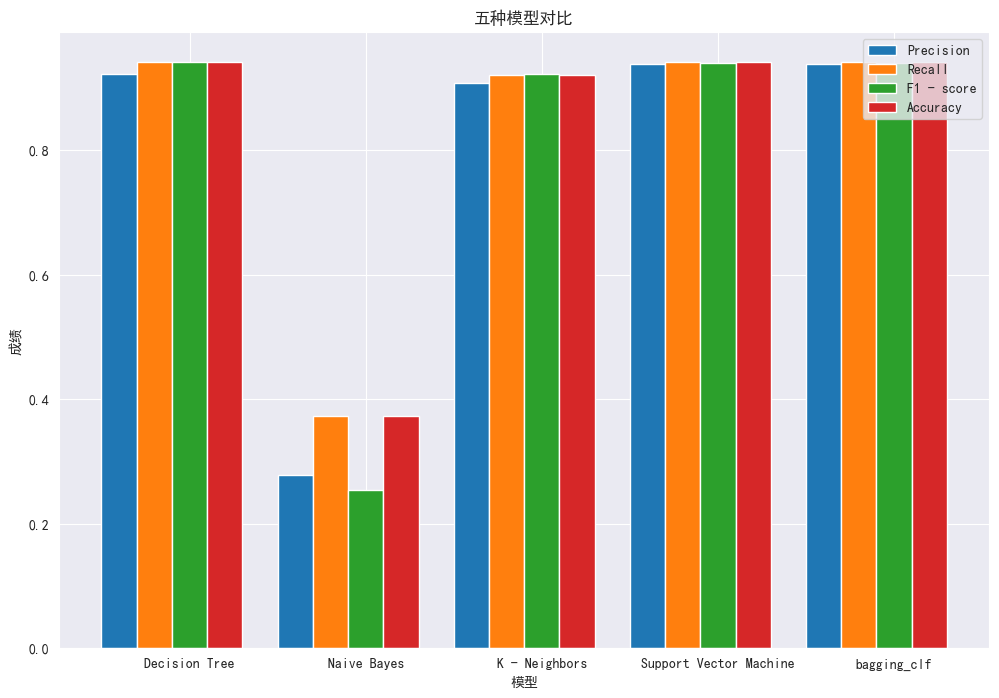

In [12]:
mpl.rcParams['font.family'] = 'SimHei'
plt.figure(figsize=(12, 8))
bar_width = 0.2
bar_positions_precision = range(len(df['Model']))
bar_positions_recall = [pos + bar_width for pos in bar_positions_precision]
bar_positions_f1 = [pos + 2 * bar_width for pos in bar_positions_precision]
bar_positions_accuracy = [pos + 3 * bar_width for pos in bar_positions_precision]

# 绘制Precision的条形图SS
plt.bar(bar_positions_precision, df['Precision'], width=bar_width, label='Precision')
# 绘制Recall的条形图
plt.bar(bar_positions_recall, df['Recall'], width=bar_width, label='Recall')
# 绘制F1 - score的条形图
plt.bar(bar_positions_f1, df['F1 - score'], width=bar_width, label='F1 - score')
# 绘制Accuracy的条形图
plt.bar(bar_positions_accuracy, df['Accuracy'], width=bar_width, label='Accuracy')

# plt.bar(bar_positions_accuracy, df['Accuracy'], width=bar_width, label='Accuracy')

# 设置x轴标签
plt.xticks([pos + 2 * bar_width for pos in bar_positions_precision], df['Model'])
plt.xlabel('模型')
plt.ylabel('成绩')
plt.title('五种模型对比')
plt.legend()
plt.show()

In [13]:
d = pd.DataFrame({'Age':[25],
                  'Gender':['Male'],
                  'Platform':['Instagram'],
                  'Daily_Usage_Time (minutes)':[120],
                  "Posts_Per_Day":[3],
                  "Likes_Received_Per_Day":[45],
                  "Comments_Received_Per_Day":[10],
                  "Messages_Sent_Per_Day":[12]
                  })
if d.loc[0,"Gender"] == 'Male':
    d["Gender_Male" ] = [1]
else:
    d["Gender_Non-binary"] = [1]
d["Platform" + "_" + str(d.loc[0,"Platform"])] = [1]
d.drop("Platform",axis = 1)
d.drop("Gender",axis = 1)

,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Male,Platform_Instagram
0,25,Instagram,120,3,45,10,12,1,1


In [14]:
missing_cols_test = set(test_x.columns) - set(d.columns)
for col in missing_cols_test:
    d[col] = 0
d = d[test_x.columns]
d

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,25,120,3,45,10,12,1,0,1,0,0,0,0,0


In [15]:
test_x

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,27,120,4,40,18,22,False,False,False,False,True,False,False,False
1,21,60,1,18,7,12,False,True,False,False,True,False,False,False
2,28,115,3,38,18,27,False,True,False,False,True,False,False,False
3,27,105,3,48,20,28,True,False,False,False,False,True,False,False
4,21,55,3,17,7,12,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,22,70,1,20,5,22,True,False,False,False,False,False,True,False
98,33,85,4,35,18,18,True,False,False,True,False,False,False,False
99,24,110,6,35,23,25,False,True,False,False,False,False,False,False
100,24,75,3,37,16,22,True,False,False,False,False,True,False,False


In [16]:
bagging_clf.predict(d)[0]

'Happiness'

In [17]:
features = ['Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day',
            'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']


In [18]:
user_data = {'Age': '12', 'Gender': 'Female', 'Platform': 'Snapchat', 'Daily_Usage_Time (minutes)': '12', 'Posts_Per_Day': '12', 'Likes_Received_Per_Day': '12', 'Comments_Received_Per_Day': '12', 'Messages_Sent_Per_Day': '12'}

In [19]:
user_df = pd.DataFrame([user_data], columns=features)
user_df

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
0,12,Female,Snapchat,12,12,12,12,12


In [30]:
import numpy as np
list(set(test_y['Dominant_Emotion']))

['Sadness', 'Anxiety', 'Neutral', 'Anger', 'Happiness', 'Boredom']

In [2]:
import numpy as np

In [4]:
a = np.random.randn(5, 1)

In [6]:
a / a * 3

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.]])